In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
train_df = pd.read_csv('train_v2.csv')
test_df = pd.read_csv('test_v2.csv')
store_df = pd.read_csv('store.csv')
sumbit_df = pd.read_csv('sample_submission.csv')
train_df

C:\Users\rwx1297581\AppData\Local\Temp\ipykernel_58812\683840106.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train_v2.csv')


Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0          1          5  2015-01-30   5577        616     1      1   
1          2          5  2015-01-30   5919        624     1      1   
2          3          5  2015-01-30   6911        678     1      1   
3          4          5  2015-01-30  13307       1632     1      1   
4          5          5  2015-01-30   5640        617     1      1   
...      ...        ...         ...    ...        ...   ...    ...   
66895    864          3  2014-11-26   5156        626     1      1   
66896    865          3  2014-11-26   9337        646     1      1   
66897    866          3  2014-11-26   7973        479     1      1   
66898    867          3  2014-11-26   5391        440     1      1   
66899    868          3  2014-11-26   9478        579     1      1   

      StateHoliday  SchoolHoliday  
0                0              0  
1                0              0  
2                0              0  
3                0              0  
4                0              0  
...            ...            ...  
66895            0              0  
66896            0              0  
66897            0              0  
66898            0              0  
66899            0              0  

[66900 rows x 9 columns]

In [4]:
test_df

Store  DayOfWeek        Date  Customers  Open  Promo  StateHoliday  \
0          1          5  2015-07-31        555     1      1             0   
1          2          5  2015-07-31        625     1      1             0   
2          3          5  2015-07-31        821     1      1             0   
3          4          5  2015-07-31       1498     1      1             0   
4          5          5  2015-07-31        559     1      1             0   
...      ...        ...         ...        ...   ...    ...           ...   
33445   1111          4  2015-07-02        329     1      1             0   
33446   1112          4  2015-07-02        577     1      1             0   
33447   1113          4  2015-07-02        793     1      1             0   
33448   1114          4  2015-07-02       3784     1      1             0   
33449   1115          4  2015-07-02        452     1      1             0   

       SchoolHoliday  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
33445              1  
33446              1  
33447              0  
33448              0  
33449              0  

[33450 rows x 8 columns]

In [5]:
merged_train_df = train_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')
merged_train_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0          1          5  2015-01-30   5577        616     1      1   
1          2          5  2015-01-30   5919        624     1      1   
2          3          5  2015-01-30   6911        678     1      1   
3          4          5  2015-01-30  13307       1632     1      1   
4          5          5  2015-01-30   5640        617     1      1   
...      ...        ...         ...    ...        ...   ...    ...   
66895    864          3  2014-11-26   5156        626     1      1   
66896    865          3  2014-11-26   9337        646     1      1   
66897    866          3  2014-11-26   7973        479     1      1   
66898    867          3  2014-11-26   5391        440     1      1   
66899    868          3  2014-11-26   9478        579     1      1   

      StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                0              0         c          a               1270.0   
1                0              0         a          a                570.0   
2                0              0         a          a              14130.0   
3                0              0         c          c                620.0   
4                0              0         a          a              29910.0   
...            ...            ...       ...        ...                  ...   
66895            0              0         a          a               1020.0   
66896            0              0         d          c               2640.0   
66897            0              0         d          a               9680.0   
66898            0              0         d          c              21810.0   
66899            0              0         d          c               1360.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           11.0                    2007.0       1   
2                           12.0                    2006.0       1   
3                            9.0                    2009.0       0   
4                            4.0                    2015.0       0   
...                          ...                       ...     ...   
66895                       10.0                    2012.0       1   
66896                        NaN                       NaN       0   
66897                        NaN                       NaN       1   
66898                        9.0                    2012.0       0   
66899                        8.0                    2005.0       1   

       Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0                  NaN              NaN              NaN  
1                 13.0           2010.0  Jan,Apr,Jul,Oct  
2                 14.0           2011.0  Jan,Apr,Jul,Oct  
3                  NaN              NaN              NaN  
4                  NaN              NaN              NaN  
...                ...              ...              ...  
66895             45.0           2009.0  Feb,May,Aug,Nov  
66896              NaN              NaN              NaN  
66897              5.0           2013.0  Feb,May,Aug,Nov  
66898              NaN              NaN              NaN  
66899             10.0           2014.0  Jan,Apr,Jul,Oct  

[66900 rows x 18 columns]

In [6]:
fig = px.histogram(merged_train_df,
                   x = 'StoreType',
                   marginal='box',
                   title='Store Type')
fig.update_layout(bargap=0.1)

In [7]:
fig = px.histogram(merged_train_df,
                   x = 'Sales',
                   marginal='box',
                   color='StoreType',
                   color_discrete_sequence=['green', 'red', 'black', 'blue'],
                   title='Sales per Store Type')
fig.update_layout(bargap=0.1)

In [8]:
fig = px.histogram(merged_train_df,
                   x = 'Sales',
                   marginal='box',
                   color='StateHoliday',
                   color_discrete_sequence=['green', 'red', 'black', 'blue'],
                   title='Sales per State Holiday')
fig.update_layout(bargap=0.1)

In [9]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [10]:
split_date(merged_train_df)
split_date(merged_test_df)

In [11]:
merged_train_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0          1          5 2015-01-30   5577        616     1      1   
1          2          5 2015-01-30   5919        624     1      1   
2          3          5 2015-01-30   6911        678     1      1   
3          4          5 2015-01-30  13307       1632     1      1   
4          5          5 2015-01-30   5640        617     1      1   
...      ...        ...        ...    ...        ...   ...    ...   
66895    864          3 2014-11-26   5156        626     1      1   
66896    865          3 2014-11-26   9337        646     1      1   
66897    866          3 2014-11-26   7973        479     1      1   
66898    867          3 2014-11-26   5391        440     1      1   
66899    868          3 2014-11-26   9478        579     1      1   

      StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0                0              0         c  ...                       9.0   
1                0              0         a  ...                      11.0   
2                0              0         a  ...                      12.0   
3                0              0         c  ...                       9.0   
4                0              0         a  ...                       4.0   
...            ...            ...       ...  ...                       ...   
66895            0              0         a  ...                      10.0   
66896            0              0         d  ...                       NaN   
66897            0              0         d  ...                       NaN   
66898            0              0         d  ...                       9.0   
66899            0              0         d  ...                       8.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                        2008.0       0              NaN              NaN   
1                        2007.0       1             13.0           2010.0   
2                        2006.0       1             14.0           2011.0   
3                        2009.0       0              NaN              NaN   
4                        2015.0       0              NaN              NaN   
...                         ...     ...              ...              ...   
66895                    2012.0       1             45.0           2009.0   
66896                       NaN       0              NaN              NaN   
66897                       NaN       1              5.0           2013.0   
66898                    2012.0       0              NaN              NaN   
66899                    2005.0       1             10.0           2014.0   

         PromoInterval  Year Month  Day  WeekOfYear  
0                  NaN  2015     1   30           5  
1      Jan,Apr,Jul,Oct  2015     1   30           5  
2      Jan,Apr,Jul,Oct  2015     1   30           5  
3                  NaN  2015     1   30           5  
4                  NaN  2015     1   30           5  
...                ...   ...   ...  ...         ...  
66895  Feb,May,Aug,Nov  2014    11   26          48  
66896              NaN  2014    11   26          48  
66897  Feb,May,Aug,Nov  2014    11   26          48  
66898              NaN  2014    11   26          48  
66899  Jan,Apr,Jul,Oct  2014    11   26          48  

[66900 rows x 22 columns]

In [12]:
merged_train_df = merged_train_df[merged_train_df.Open == 1].copy()

In [13]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x< 0 else x).fillna(0)

In [14]:
comp_months(merged_train_df)
comp_months(merged_test_df)

In [15]:
merged_train_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0          1          5 2015-01-30   5577        616     1      1   
1          2          5 2015-01-30   5919        624     1      1   
2          3          5 2015-01-30   6911        678     1      1   
3          4          5 2015-01-30  13307       1632     1      1   
4          5          5 2015-01-30   5640        617     1      1   
...      ...        ...        ...    ...        ...   ...    ...   
66895    864          3 2014-11-26   5156        626     1      1   
66896    865          3 2014-11-26   9337        646     1      1   
66897    866          3 2014-11-26   7973        479     1      1   
66898    867          3 2014-11-26   5391        440     1      1   
66899    868          3 2014-11-26   9478        579     1      1   

      StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceYear  \
0                0              0         c  ...                   2008.0   
1                0              0         a  ...                   2007.0   
2                0              0         a  ...                   2006.0   
3                0              0         c  ...                   2009.0   
4                0              0         a  ...                   2015.0   
...            ...            ...       ...  ...                      ...   
66895            0              0         a  ...                   2012.0   
66896            0              0         d  ...                      NaN   
66897            0              0         d  ...                      NaN   
66898            0              0         d  ...                   2012.0   
66899            0              0         d  ...                   2005.0   

       Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  \
0           0              NaN              NaN              NaN  2015      1   
1           1             13.0           2010.0  Jan,Apr,Jul,Oct  2015      1   
2           1             14.0           2011.0  Jan,Apr,Jul,Oct  2015      1   
3           0              NaN              NaN              NaN  2015      1   
4           0              NaN              NaN              NaN  2015      1   
...       ...              ...              ...              ...   ...    ...   
66895       1             45.0           2009.0  Feb,May,Aug,Nov  2014     11   
66896       0              NaN              NaN              NaN  2014     11   
66897       1              5.0           2013.0  Feb,May,Aug,Nov  2014     11   
66898       0              NaN              NaN              NaN  2014     11   
66899       1             10.0           2014.0  Jan,Apr,Jul,Oct  2014     11   

      Day  WeekOfYear  CompetitionOpen  
0      30           5             76.0  
1      30           5             86.0  
2      30           5             97.0  
3      30           5             64.0  
4      30           5              0.0  
...    ..         ...              ...  
66895  26          48             25.0  
66896  26          48              0.0  
66897  26          48              0.0  
66898  26          48             26.0  
66899  26          48            111.0  

[54688 rows x 23 columns]

In [16]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0
    
def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek) *7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if pd.isna(x) or x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']  

In [17]:
promo_cols(merged_train_df)
promo_cols(merged_test_df)

In [18]:
merged_train_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0          1          5 2015-01-30   5577        616     1      1   
1          2          5 2015-01-30   5919        624     1      1   
2          3          5 2015-01-30   6911        678     1      1   
3          4          5 2015-01-30  13307       1632     1      1   
4          5          5 2015-01-30   5640        617     1      1   
...      ...        ...        ...    ...        ...   ...    ...   
66895    864          3 2014-11-26   5156        626     1      1   
66896    865          3 2014-11-26   9337        646     1      1   
66897    866          3 2014-11-26   7973        479     1      1   
66898    867          3 2014-11-26   5391        440     1      1   
66899    868          3 2014-11-26   9478        579     1      1   

      StateHoliday  SchoolHoliday StoreType  ... Promo2SinceWeek  \
0                0              0         c  ...             NaN   
1                0              0         a  ...            13.0   
2                0              0         a  ...            14.0   
3                0              0         c  ...             NaN   
4                0              0         a  ...             NaN   
...            ...            ...       ...  ...             ...   
66895            0              0         a  ...            45.0   
66896            0              0         d  ...             NaN   
66897            0              0         d  ...             5.0   
66898            0              0         d  ...             NaN   
66899            0              0         d  ...            10.0   

       Promo2SinceYear    PromoInterval  Year  Month  Day  WeekOfYear  \
0                  NaN              NaN  2015      1   30           5   
1               2010.0  Jan,Apr,Jul,Oct  2015      1   30           5   
2               2011.0  Jan,Apr,Jul,Oct  2015      1   30           5   
3                  NaN              NaN  2015      1   30           5   
4                  NaN              NaN  2015      1   30           5   
...                ...              ...   ...    ...  ...         ...   
66895           2009.0  Feb,May,Aug,Nov  2014     11   26          48   
66896              NaN              NaN  2014     11   26          48   
66897           2013.0  Feb,May,Aug,Nov  2014     11   26          48   
66898              NaN              NaN  2014     11   26          48   
66899           2014.0  Jan,Apr,Jul,Oct  2014     11   26          48   

      CompetitionOpen  Promo2Open  IsPromo2Month  
0                76.0    0.000000              0  
1                86.0   58.163934              1  
2                97.0   45.934426              1  
3                64.0    0.000000              0  
4                 0.0    0.000000              0  
...               ...         ...            ...  
66895            25.0   60.688525              1  
66896             0.0    0.000000              0  
66897             0.0   21.868852              1  
66898            26.0    0.000000              0  
66899           111.0    8.721311              0  

[54688 rows x 25 columns]

In [19]:
merged_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [20]:
input_cols = ['Store', 'DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance','Promo2', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [21]:
inputs = merged_train_df[input_cols].copy()
target = merged_train_df[target_col].copy()

In [22]:
inputs

Store  DayOfWeek  Promo StateHoliday  SchoolHoliday StoreType  \
0          1          5      1            0              0         c   
1          2          5      1            0              0         a   
2          3          5      1            0              0         a   
3          4          5      1            0              0         c   
4          5          5      1            0              0         a   
...      ...        ...    ...          ...            ...       ...   
66895    864          3      1            0              0         a   
66896    865          3      1            0              0         d   
66897    866          3      1            0              0         d   
66898    867          3      1            0              0         d   
66899    868          3      1            0              0         d   

      Assortment  CompetitionDistance  Promo2  Year  Month  Day  WeekOfYear  \
0              a               1270.0       0  2015      1   30           5   
1              a                570.0       1  2015      1   30           5   
2              a              14130.0       1  2015      1   30           5   
3              c                620.0       0  2015      1   30           5   
4              a              29910.0       0  2015      1   30           5   
...          ...                  ...     ...   ...    ...  ...         ...   
66895          a               1020.0       1  2014     11   26          48   
66896          c               2640.0       0  2014     11   26          48   
66897          a               9680.0       1  2014     11   26          48   
66898          c              21810.0       0  2014     11   26          48   
66899          c               1360.0       1  2014     11   26          48   

       CompetitionOpen  Promo2Open  IsPromo2Month  
0                 76.0    0.000000              0  
1                 86.0   58.163934              1  
2                 97.0   45.934426              1  
3                 64.0    0.000000              0  
4                  0.0    0.000000              0  
...                ...         ...            ...  
66895             25.0   60.688525              1  
66896              0.0    0.000000              0  
66897              0.0   21.868852              1  
66898             26.0    0.000000              0  
66899            111.0    8.721311              0  

[54688 rows x 16 columns]

In [23]:
target

0         5577
1         5919
2         6911
3        13307
4         5640
         ...  
66895     5156
66896     9337
66897     7973
66898     5391
66899     9478
Name: Sales, Length: 54688, dtype: int64

In [24]:
test_inputs = merged_test_df[input_cols].copy()

In [25]:
test_inputs

Store  DayOfWeek  Promo  StateHoliday  SchoolHoliday StoreType  \
0          1          5      1             0              1         c   
1          2          5      1             0              1         a   
2          3          5      1             0              1         a   
3          4          5      1             0              1         c   
4          5          5      1             0              1         a   
...      ...        ...    ...           ...            ...       ...   
33445   1111          4      1             0              1         a   
33446   1112          4      1             0              1         c   
33447   1113          4      1             0              0         a   
33448   1114          4      1             0              0         a   
33449   1115          4      1             0              0         d   

      Assortment  CompetitionDistance  Promo2  Year  Month  Day  WeekOfYear  \
0              a               1270.0       0  2015      7   31          31   
1              a                570.0       1  2015      7   31          31   
2              a              14130.0       1  2015      7   31          31   
3              c                620.0       0  2015      7   31          31   
4              a              29910.0       0  2015      7   31          31   
...          ...                  ...     ...   ...    ...  ...         ...   
33445          a               1900.0       1  2015      7    2          27   
33446          c               1880.0       0  2015      7    2          27   
33447          c               9260.0       0  2015      7    2          27   
33448          c                870.0       0  2015      7    2          27   
33449          c               5350.0       1  2015      7    2          27   

       CompetitionOpen  Promo2Open  IsPromo2Month  
0                 82.0    0.000000              0  
1                 92.0   64.131148              1  
2                103.0   51.901639              1  
3                 70.0    0.000000              0  
4                  3.0    0.000000              0  
...                ...         ...            ...  
33445             13.0   23.081967              1  
33446            111.0    0.000000              0  
33447              0.0    0.000000              0  
33448              0.0    0.000000              0  
33449              0.0   37.147541              0  

[33450 rows x 16 columns]

In [26]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
                'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
                'Day', 'Month', 'Year', 'WeekOfYear', 'DayOfWeek']
categorical_cols = ['StoreType', 'Assortment']  #, 'DayOfWeek'

In [27]:
inputs[numeric_cols].isna().sum()

Store                    0
Promo                    0
SchoolHoliday            0
CompetitionDistance    132
CompetitionOpen          0
Promo2                   0
Promo2Open               0
IsPromo2Month            0
Day                      0
Month                    0
Year                     0
WeekOfYear               0
DayOfWeek                0
dtype: int64

In [28]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    90
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
DayOfWeek               0
dtype: int64

In [29]:
max_distance = inputs.CompetitionDistance.max()

In [30]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [31]:
inputs

Store  DayOfWeek  Promo StateHoliday  SchoolHoliday StoreType  \
0          1          5      1            0              0         c   
1          2          5      1            0              0         a   
2          3          5      1            0              0         a   
3          4          5      1            0              0         c   
4          5          5      1            0              0         a   
...      ...        ...    ...          ...            ...       ...   
66895    864          3      1            0              0         a   
66896    865          3      1            0              0         d   
66897    866          3      1            0              0         d   
66898    867          3      1            0              0         d   
66899    868          3      1            0              0         d   

      Assortment  CompetitionDistance  Promo2  Year  Month  Day  WeekOfYear  \
0              a               1270.0       0  2015      1   30           5   
1              a                570.0       1  2015      1   30           5   
2              a              14130.0       1  2015      1   30           5   
3              c                620.0       0  2015      1   30           5   
4              a              29910.0       0  2015      1   30           5   
...          ...                  ...     ...   ...    ...  ...         ...   
66895          a               1020.0       1  2014     11   26          48   
66896          c               2640.0       0  2014     11   26          48   
66897          a               9680.0       1  2014     11   26          48   
66898          c              21810.0       0  2014     11   26          48   
66899          c               1360.0       1  2014     11   26          48   

       CompetitionOpen  Promo2Open  IsPromo2Month  
0                 76.0    0.000000              0  
1                 86.0   58.163934              1  
2                 97.0   45.934426              1  
3                 64.0    0.000000              0  
4                  0.0    0.000000              0  
...                ...         ...            ...  
66895             25.0   60.688525              1  
66896              0.0    0.000000              0  
66897              0.0   21.868852              1  
66898             26.0    0.000000              0  
66899            111.0    8.721311              0  

[54688 rows x 16 columns]

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [33]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

c:\Users\rwx1297581\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [36]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [37]:
x = inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [38]:
from xgboost import XGBRegressor

In [39]:
?XGBRegressor

Init signature:
XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    v

In [40]:
xgb = XGBRegressor(random_state=42, n_jobs=1, n_estimators=20, max_depth=4)

In [41]:
%%time
xgb.fit(x, target)

CPU times: total: 375 ms
Wall time: 429 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=1,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
preds = xgb.predict(x)
preds

array([7807.589 , 7215.2007, 7655.1294, ..., 6547.037 , 8772.715 ,
       9005.657 ], dtype=float32)

In [43]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [44]:
rmse(preds, target)

2507.4738780993853

In [45]:
merged_train_df.Sales.min(), merged_train_df.Sales.max()

(632, 37122)

(array([1.458e+03, 4.805e+03, 2.614e+03, 7.540e+02, 2.470e+02, 8.800e+01,
        2.100e+01, 1.100e+01, 0.000e+00, 2.000e+00]),
 array([  887. ,  4510.5,  8134. , 11757.5, 15381. , 19004.5, 22628. ,
        26251.5, 29875. , 33498.5, 37122. ]),
 <BarContainer object of 10 artists>)

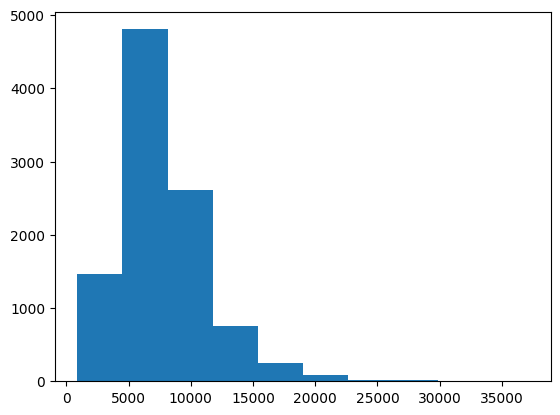

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(merged_train_df.Sales.sample(10000))

In [47]:
from xgboost import plot_tree
import graphviz
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 30

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

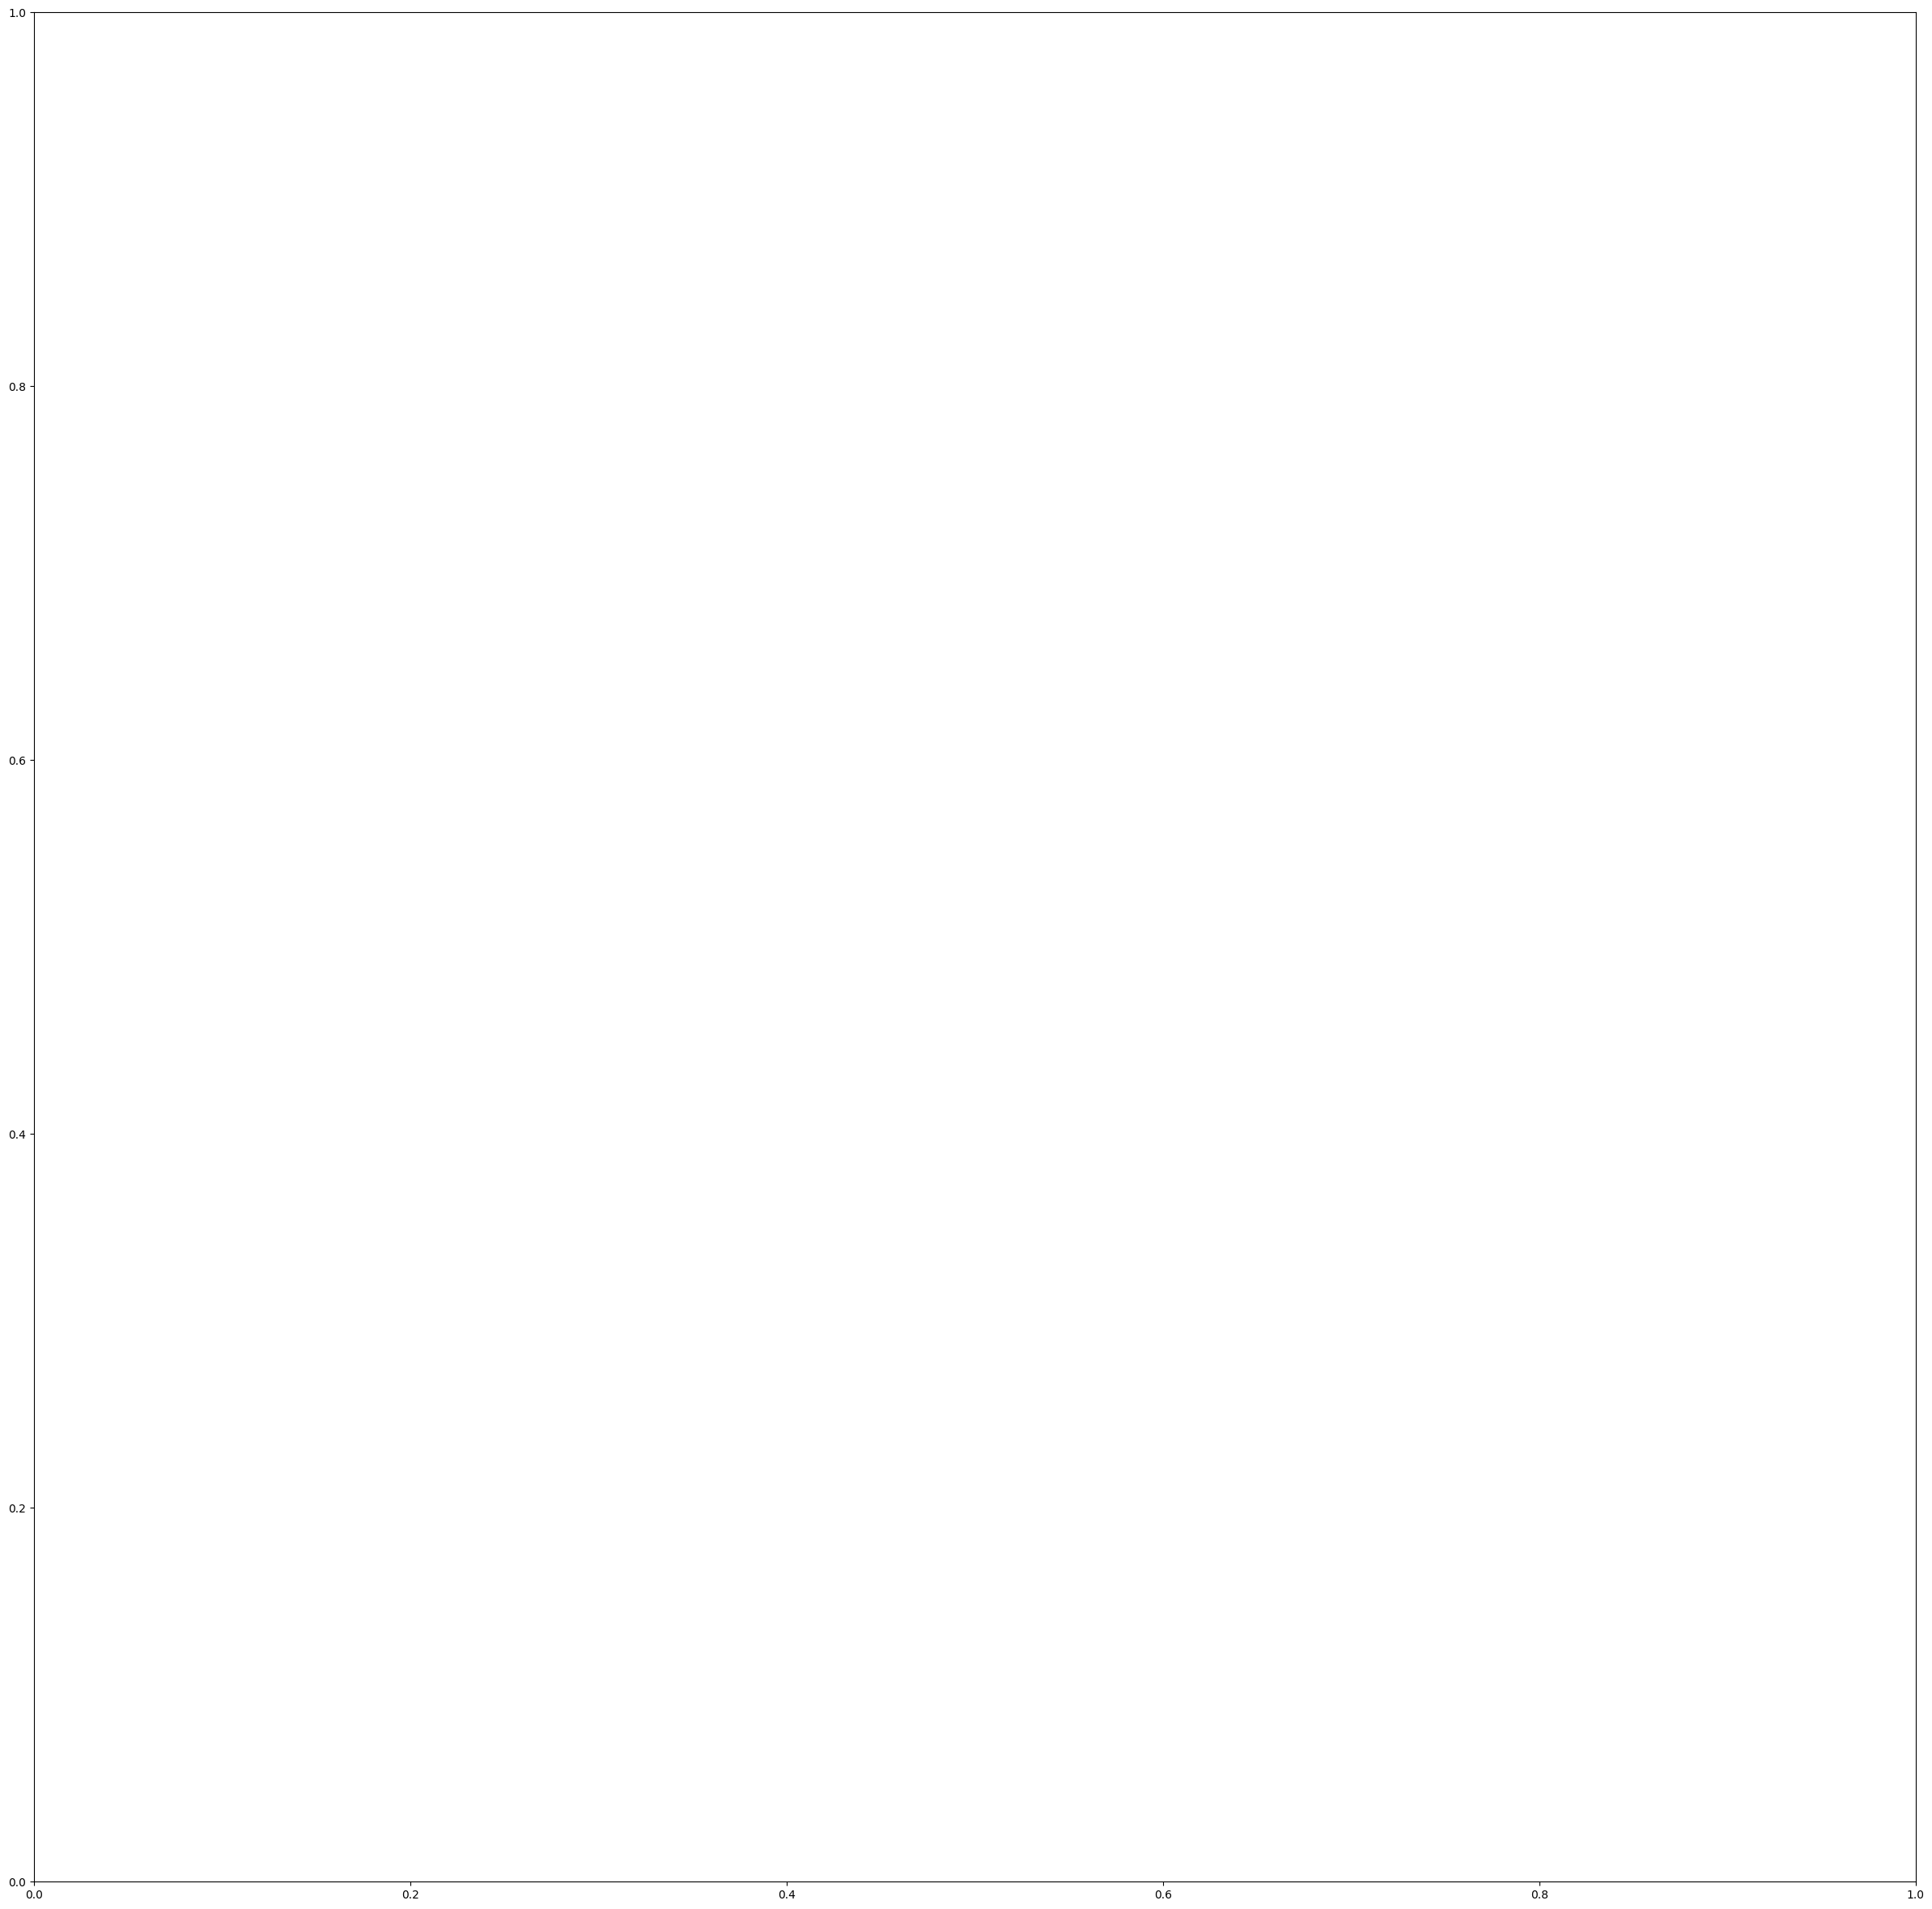

In [48]:
plot_tree(xgb, rankdir='LR')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

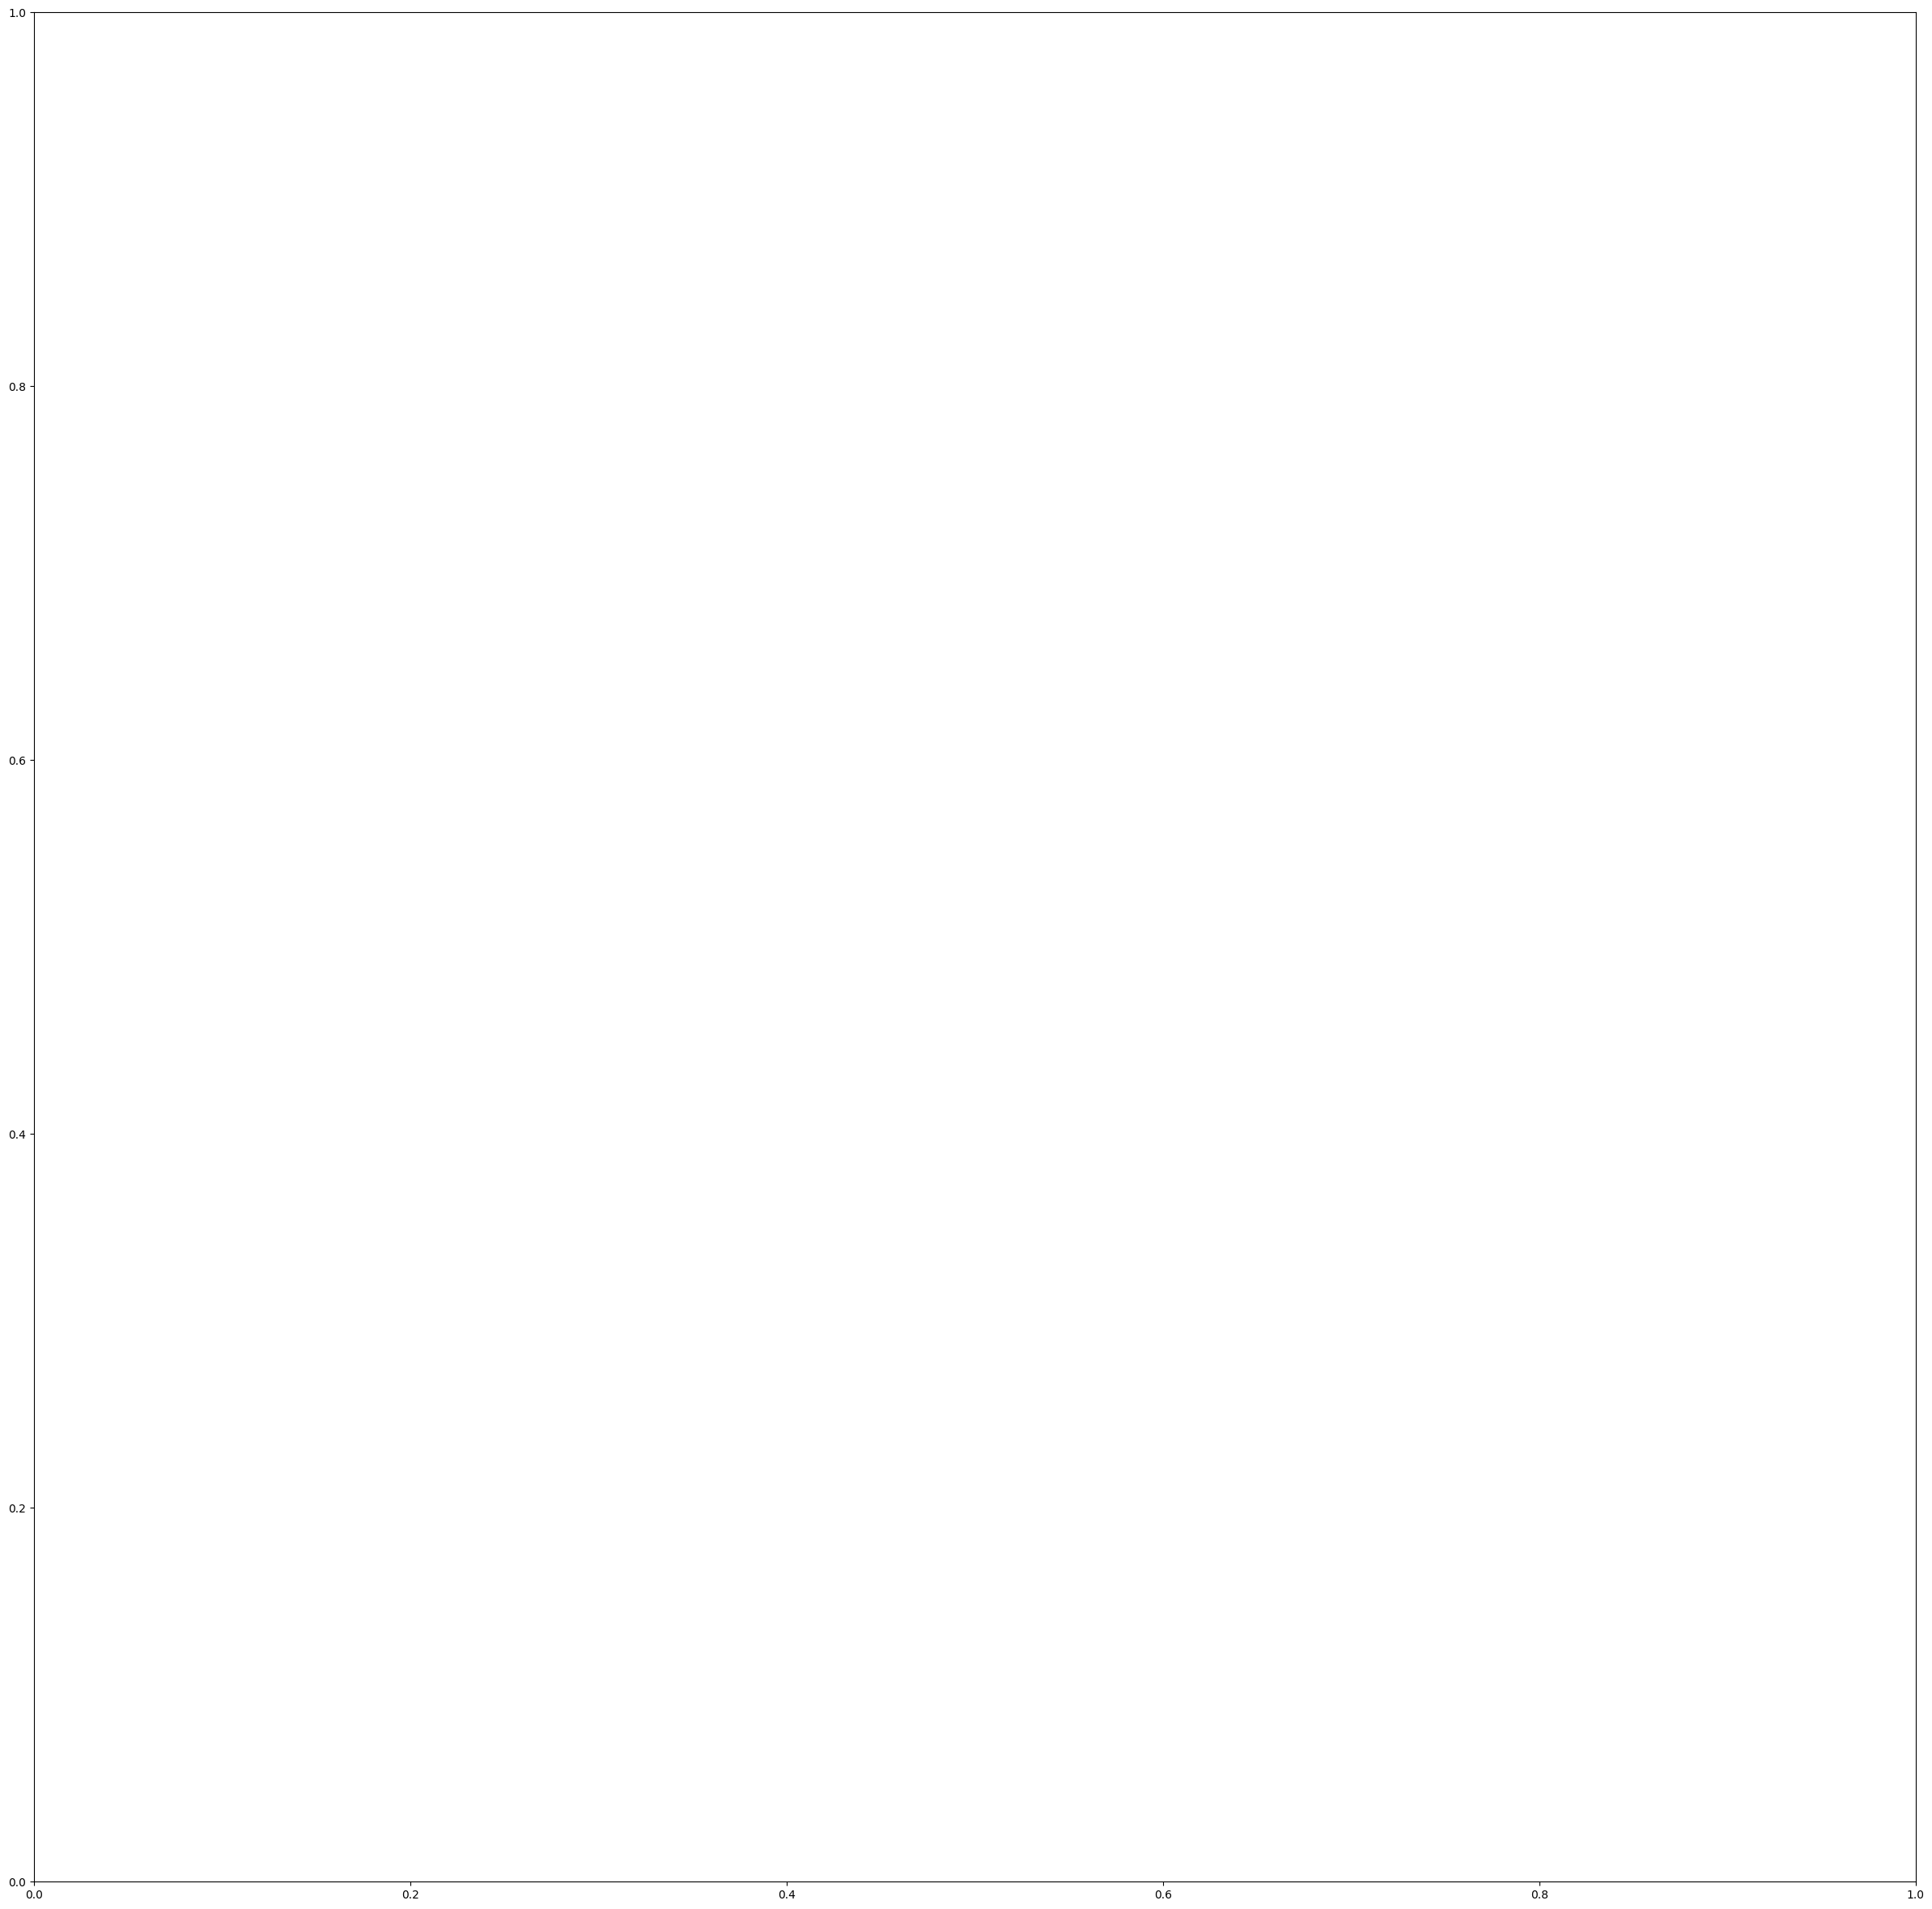

In [ ]:
plot_tree(xgb, rankdir='LR', num_trees=1)

In [49]:
trees = xgb.get_booster().get_dump()

In [50]:
len(trees)

20

In [51]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[WeekOfYear<0.980392158] yes=3,no=4,missing=4
		3:[Month<0.909090936] yes=7,no=8,missing=8
			7:[StoreType_b<1] yes=15,no=16,missing=16
				15:leaf=-654.47876
				16:leaf=378.760559
			8:[Day<1] yes=17,no=18,missing=18
				17:leaf=-167.38797
				18:leaf=-1075.16675
		4:[DayOfWeek<0.333333343] yes=9,no=10,missing=10
			9:[Assortment_c<1] yes=19,no=20,missing=20
				19:leaf=866.100403
				20:leaf=1471.79907
			10:[Day<0.699999988] yes=21,no=22,missing=22
				21:leaf=235.572128
				22:leaf=-629.589233
	2:[Month<1] yes=5,no=6,missing=6
		5:[DayOfWeek<0.166666672] yes=11,no=12,missing=12
			11:[Day<0.166666672] yes=23,no=24,missing=24
				23:leaf=714.50293
				24:leaf=263.477051
			12:[Month<0.909090936] yes=25,no=26,missing=26
				25:leaf=-89.2439804
				26:leaf=321.095154
		6:[DayOfWeek<0.166666672] yes=13,no=14,missing=14
			13:[Day<0.0333333351] yes=27,no=28,missing=28
				27:leaf=970.147522
				28:leaf=1565.15076
			14:[Day<0.13333334] yes=29,no=30,m

In [53]:
importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

In [54]:
importance_df.head(10)

feature  importance
1                 Promo    0.183252
9                 Month    0.179313
17         Assortment_a    0.087843
11           WeekOfYear    0.070815
5                Promo2    0.069728
12            DayOfWeek    0.065811
14          StoreType_b    0.049810
8                   Day    0.036116
7         IsPromo2Month    0.034062
3   CompetitionDistance    0.032972

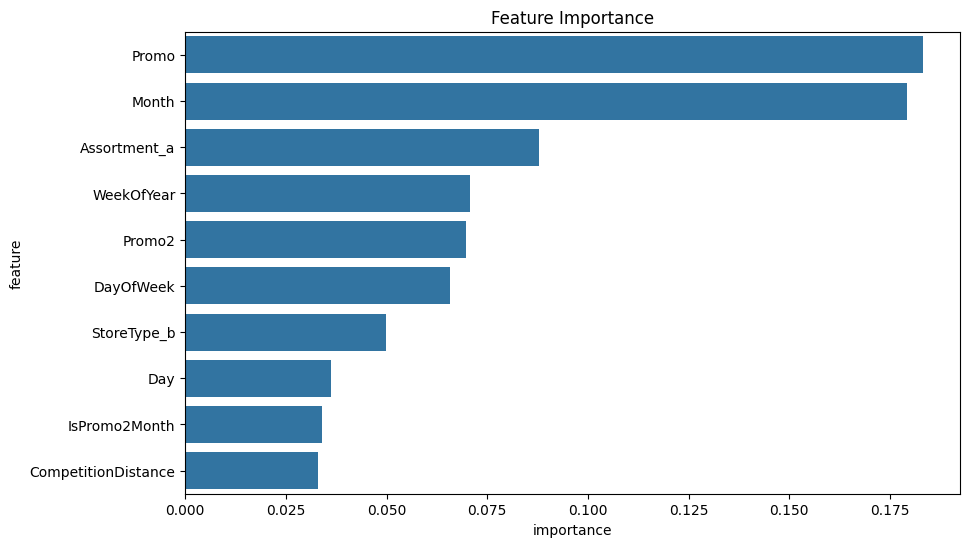

In [55]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');